In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getAreaDFbyPrefix

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0077    0.9 -0.1415  0.157  False
     1      3   0.0723 0.5483 -0.0769 0.2216  False
     1      4   0.0988 0.1435 -0.0231 0.2206  False
     2      3   0.0646 0.7138 -0.1077  0.237  False
     2      4    0.091 0.3582 -0.0582 0.2403  False
     3      4   0.0264    0.9 -0.1228 0.1757  False
---------------------------------------------------
p values of all pair-wise tests:
 [0.9        0.54834612 0.14352787 0.71379894 0.3582211  0.9       ]


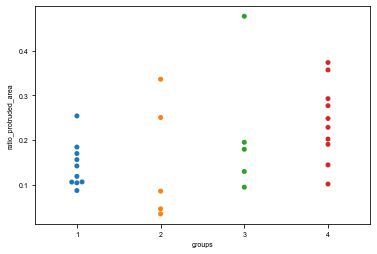

In [27]:
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20191219-2-6dpt-singleZ-integrin-activation-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder)
df.head()

# Annotate the data set
#
# The layout of this data set is straightforward.
# For integrin activation test, only Matrigel was added (no ABA)
# Integrin activation was done by adding 50 uM MnCl2, 10 ug/mL TS2/16 or both
#
# Group 1, E2-E11: sg-Control mixed with sg2-Ecad (4:1)
# Group 2, F2-F6: sg-Control mixed with sg2-Ecad (4:1), 50 uM MnCl2
# Group 3, F7-F11: sg-Control mixed with sg2-Ecad (4:1), 10 ug/mL TS2/16
# Group 4, G2-G11: sg-Control mixed with sg2-Ecad (4:1), 50 uM MnCl2 and 10 ug/mL TS2/16

groups = ["1"]*10 + ["2"]*5 + ["3"]*5 + ["4"]*10
# groups = ["1"]*10 + ["2"]*20
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     e      f    0.055  0.32 -0.0367 0.1468  False
     e      g   0.1963 0.001  0.1168 0.2757   True
     f      g   0.1413 0.001  0.0618 0.2207   True
--------------------------------------------------
p values of all pair-wise tests:
 [0.31996381 0.001      0.001     ]


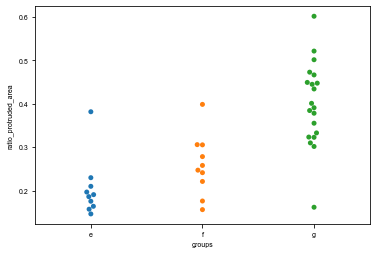

In [51]:
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'

# Part 1 of the data

datasetPrefix = '20200120-complete-set-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder)

# Annotate the data set
#
# For integrin activation test, only Matrigel was added (no ABA)
# Integrin activation was done by adding 50 uM MnCl2
#
# Group e, B2-B11: sg-Control only
# Group f, E2-E11: sg-Control mixed with sg2-Ecad (4:1)
# Group g, F2-G11: sg-Control mixed with sg2-Ecad (4:1), 50 uM MnCl2

groups = ["e"]*10 + ["f"]*10 + ["g"]*20
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
# Note: For stats of 2-groups, the Tukey test is equivalent to a ttest
tukeyTest(df.ratio_protruded_area, df.groups)

## For stats of 2-groups, the Tukey test is equivalent to a ttest
## Check results of ttest for comparison
#
# from scipy.stats import ttest_ind
# a = df.ratio_protruded_area[:10]
# b = df.ratio_protruded_area[10:]
# ttest_ind(a, b)

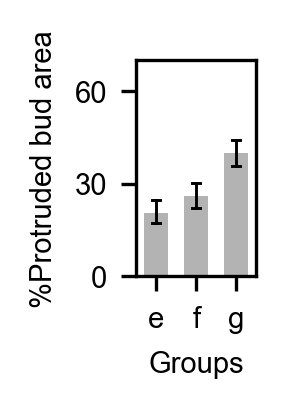

In [55]:
# Plot for figure

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100

outputFigPath = "../jupyter_figures/"+datasetPrefix+'protruded-area-bar.svg'
plotCountBar(df.groups, df.percent_protruded_area, outputFigPath,
             yMax=70,
             yTicks=[0,30,60],
             yLabel='%Protruded bud area',
             bar_width=0.6,
             fig_width=0.5, fig_height=0.9)


In [25]:
help(getAreaDFbyPrefix)

Help on function getAreaDFbyPrefix in module sw_utilities:

getAreaDFbyPrefix(datasetPrefix, datasetFolder=None, totalAreaColName=None)
    A convenience function of getAreaDF.
    
        Use pattern match to identify the corresponding pair
    of filename coding and counting files, then call getAreaDF
    to obtain the merged data frame.



Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   0.0263 0.6624 -0.0362  0.0889  False
     a      c  -0.3638  0.001  -0.418 -0.3096   True
     a      d  -0.3909  0.001 -0.4451 -0.3367   True
     b      c  -0.3901  0.001 -0.4444 -0.3359   True
     b      d  -0.4173  0.001 -0.4715 -0.3631   True
     c      d  -0.0271 0.3754 -0.0714  0.0171  False
----------------------------------------------------
p values of all pair-wise tests:
 [0.66237353 0.001      0.001      0.001      0.001      0.37539879]


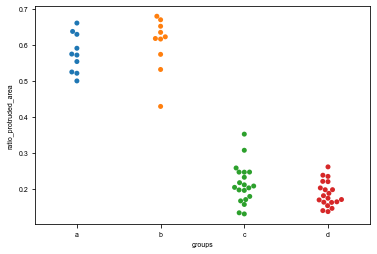

In [34]:
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = "20191219-1-"

df = getAreaDFbyPrefix(datasetPrefix, datasetFolder)

# Annotate the data set
#
# All treated with ABA and 5% Matrigel
# For integrin co-repression
#
# Group a, B2-B11: sg-control mixed with sg1-Ecad (1:1)
# Group b, C2-C11: sg-Itgb1 mixed with sg1-Ecad (1:1)
# Group c, D2-E11: sg-control mixed with sg1-Ecad/sg-Itgb1 (1:1)
# Group d, F2-G11: sg-Itgb1 mixed with sg1-Ecad/sg-Itgb1 (1:1)

groups = ["a"]*10 + ["b"]*10 + ["c"]*20 + ["d"]*20
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

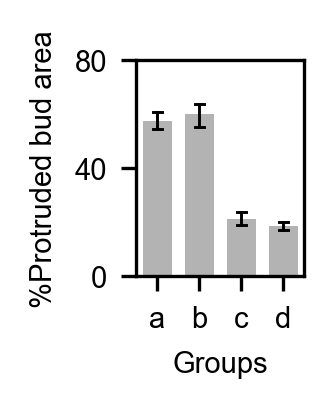

In [36]:
# plot for figure

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100

outputFigPath = "../jupyter_figures/"+datasetPrefix+'protruded-area-bar.svg'
plotCountBar(df.groups, df.percent_protruded_area, outputFigPath,
             yMax=80,
             yTicks=[0,40,80],
             yLabel='%Protruded bud area',
             bar_width=0.7,
             fig_width=0.7, fig_height=0.9)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.3618 0.001  0.2506 0.4729   True
     1      3   0.3582 0.001  0.2299 0.4865   True
     1      4   0.3576 0.001  0.2293 0.4859   True
     2      3  -0.0036   0.9 -0.1147 0.1076  False
     2      4  -0.0042   0.9 -0.1153 0.1069  False
     3      4  -0.0006   0.9  -0.129 0.1277  False
--------------------------------------------------
p values of all pair-wise tests:
 [0.001 0.001 0.001 0.9   0.9   0.9  ]


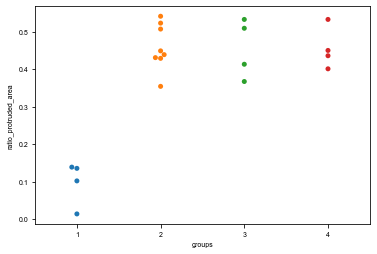

In [4]:
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20190823-0906'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder)

# Annotate the data set
#
# This combined dataset is assaying the effects of varying mixing ratios of
# sg-Control and sg2-Ecad cells (190823 and 190906)
#
# All treated with ABA and 5% Matrigel
#
# Group 1, 190823, C4-C7: sg-Control : sg2-Ecad (1:0)
# Group 4, 190823, D4-D7: sg-Control : sg2-Ecad (0:1)
# Group 2, 190823, E4-E7: sg-Control : sg2-Ecad (4:1)
# Group 2, 190906, C4-C7: sg-Control : sg2-Ecad (4:1)
# Group 3, 190906, D4-D7: sg-Control : sg2-Ecad (1:1)


groups = ["1"]*4 + ["4"]*4 + ["2"]*4 + ["2"]*4 + ["3"]*4
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.3278  0.001  0.2474 0.4082   True
     1      3   0.3194  0.001  0.2355 0.4033   True
     1      4   0.2911  0.001  0.2107 0.3715   True
     1      x   0.3179  0.001  0.2375 0.3983   True
     2      3  -0.0084    0.9 -0.0948  0.078  False
     2      4  -0.0367 0.6814 -0.1198 0.0463  False
     2      x  -0.0099    0.9 -0.0929 0.0731  False
     3      4  -0.0283 0.8635 -0.1147 0.0581  False
     3      x  -0.0015    0.9 -0.0879 0.0849  False
     4      x   0.0268 0.8707 -0.0562 0.1099  False
---------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.001      0.9        0.68135259
 0.9        0.86345541 0.9        0.87073925]


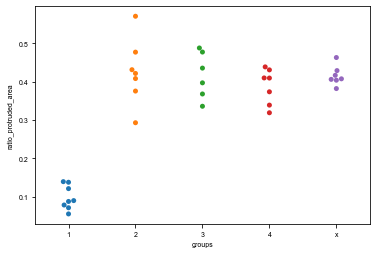

In [5]:
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20191107'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder)

# Annotate the data set
#
# This dataset is assaying the effects of varying mixing ratios of
# sg-Control and sg1-Ecad cells
#
# All treated with ABA and 5% Matrigel
# Images taken at 7 dpt (days post treatment)
#
# Note that C5, D7, E8, E10 and F11 has images not fully in the field
# of view, so they are excluded.
#
# Group 2, C4-C11 (no C5): sg-Control : sg1-Ecad (4:1)
# Group x, D4-D11 (no D7): sg-Control : sg1-Ecad (2:1)
# Group 3, E4-E11 (no E8, E10): sg-Control : sg1-Ecad (1:1)
# Group 4, F4-F11 (no F11): sg-Control : sg1-Ecad (0:1)
# Group 1, G4-G11: sg-Control : sg1-Ecad (1:0)

groups = ["2"]*7 + ["x"]*7 + ["3"]*6 + ["4"]*7 + ["1"]*8
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area, order=['1', '2', '3', '4', 'x'])

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2311 0.0938 -0.5073  0.0452  False
     1      3  -0.2896 0.0417 -0.5659 -0.0134   True
     2      3  -0.0586 0.7859 -0.3348  0.2177  False
----------------------------------------------------
p values of all pair-wise tests:
 [0.09382198 0.04167758 0.78589957]


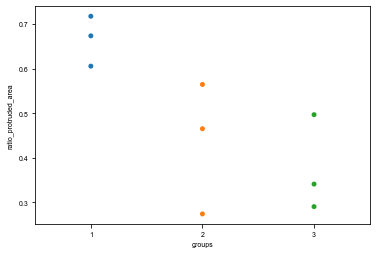

In [6]:
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20190826'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder)

# Annotate the data set
#
# This combined dataset is assaying the effects of integrin beta1 blocking antibody (mAb13), 
# using either no antibody treatment or a control antibody (alpha5-integrin; mAb16) as controls.
#
# All treated with ABA and 5% Matrigel
#
# Group 3, B2-B4: mAb13 (beta1-integrin blocking antibody)
# Group 1, B5-B7: no antibody control
# Group 2, B2-B4: mAb13 (alpha5-integrin blocking antibody; isotype-matched control)

groups = ["3"]*3 + ["1"]*3 + ["2"]*3
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1581 0.0072 -0.2885 -0.0277   True
     1      3   -0.149 0.0142 -0.2794 -0.0186   True
     1      4  -0.2048  0.001 -0.3352 -0.0744   True
     1      5  -0.1987  0.001 -0.3291 -0.0684   True
     1      6  -0.2131  0.001 -0.3434 -0.0827   True
     1      7  -0.1487 0.0145 -0.2791 -0.0183   True
     1      8   0.0421    0.9 -0.0883  0.1725  False
     2      3   0.0091    0.9 -0.1213  0.1395  False
     2      4  -0.0467    0.9 -0.1771  0.0837  False
     2      5  -0.0406    0.9  -0.171  0.0897  False
     2      6   -0.055 0.8876 -0.1854  0.0754  False
     2      7   0.0094    0.9  -0.121  0.1398  False
     2      8   0.2002  0.001  0.0698  0.3306   True
     3      4  -0.0558 0.8759 -0.1862  0.0746  False
     3      5  -0.0498    0.9 -0.1801  0.0806  False
     3      6  -0.0641 0.760

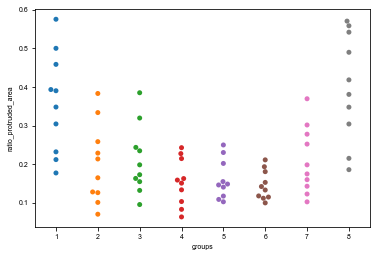

In [37]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20200909'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder)

# Annotate the data set
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# Group 1, B2-B11: MG alone (diluted from 6 mg/mL pre-made stock)
# Group 2, C2-C11: 5 MG + 1 LMN
# Group 3, D2-D11: 2 MG + 1 LMN
# Group 4, D2-D11: 1 MG + 1 LMN
# Group 5, E2-E11: 1 MG + 2 LMN
# Group 6, E2-E11: 1 MG + 5 LMN
# Group 7, plate2_B2-B11: LMN alone
# Group 8, plate2_C2-C11: MG alone (diluted from 9.7 mg/mL, rather than 6 mg/mL)

groups = ["1"]*10 + ["2"]*10 + ["3"]*10 + ["4"]*10 + ["5"]*10 + ["6"]*10 + ["7"]*10 + ["8"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

In [38]:
df.groups.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8'], dtype=object)

In [39]:
help(plotCountBar)

Help on function plotCountBar in module sw_plotting:

plotCountBar(groups, counts, outputFigPath, yMax=None, yTicks=None, yLabel=None, xticklabels_angle=None, xLabel_off=False, bar_width=0.7, fig_width=0.7, fig_height=0.9)
    plot bar plot of bud counting data, save .svg as outputFigPath
    
    Note: error bar here is 95% confidence interval by bootstrapping



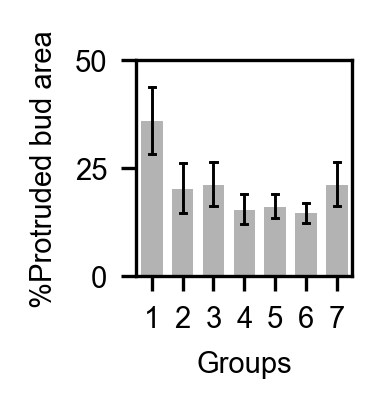

In [42]:
# plot for figure

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100
# Group 8 is a different setup of Matrigel control, but we only need 1
df_to_plot = df[df.groups.isin(['1', '2', '3', '4', '5', '6', '7'])]

outputFigPath = "../jupyter_figures/"+datasetPrefix+'protruded-area-bar.svg'
plotCountBar(df_to_plot.groups, df_to_plot.percent_protruded_area, outputFigPath,
             yMax=50, yTicks=[0,25,50],
             yLabel='%Protruded bud area',
             bar_width=0.7,
             fig_width=0.9, fig_height=0.9)

Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  BB-94 Control   0.2546  0.001  0.1463   0.363   True
  BB-94 GM-6001    0.067 0.4842 -0.0442  0.1783  False
  BB-94     LOX   0.2423  0.001   0.131  0.3536   True
  BB-94     TG5   0.2121  0.001  0.0927  0.3314   True
  BB-94    TG50   0.2175  0.001  0.1092  0.3258   True
Control GM-6001  -0.1876  0.001 -0.2989 -0.0763   True
Control     LOX  -0.0123    0.9 -0.1236   0.099  False
Control     TG5  -0.0426 0.8935 -0.1619  0.0768  False
Control    TG50  -0.0372    0.9 -0.1455  0.0712  False
GM-6001     LOX   0.1753  0.001  0.0611  0.2894   True
GM-6001     TG5    0.145 0.0114   0.023  0.2671   True
GM-6001    TG50   0.1504 0.0027  0.0392  0.2617   True
    LOX     TG5  -0.0303    0.9 -0.1523  0.0918  False
    LOX    TG50  -0.0248    0.9 -0.1361  0.0865  False
    TG5    TG50   0.0054    0.9 -0.1139  0.1248

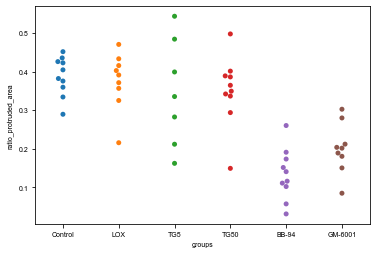

In [45]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20210123'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')

# Annotate the data set
# dataset name: 20210123-plate2-stiffness-D193-D267-1to1-7dpt-rows-singleZ
# new folder name: 20210123
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# B2-B11: Regular formula with 9.0 mg/mL Matrigel.
# C2-C11: Regular formula with 9.0 mg/mL Matrigel + LOX 150 ng/mL.
# D2-D11: Regular formula with 9.0 mg/mL Matrigel + TG 5 mU/mL.
# E2-E11: Regular formula with 9.0 mg/mL Matrigel + TG 50 mU/mL.
# F2-F11: Regular formula with 9.0 mg/mL Matrigel + BB-94 (5 μM).
# G2-G11: Regular formula with 9.0 mg/mL Matrigel + GM-6001 (25 μM).
# excluded: C2, D5, D10, D11, G9
# reason: contaminated (C2; LOX), incomplete image (G9) or off-focus (all others)

groups = ["Control"]*10 + ["LOX"]*9 + ["TG5"]*7 + ["TG50"]*10 + ["BB-94"]*10 + ["GM-6001"]*9
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

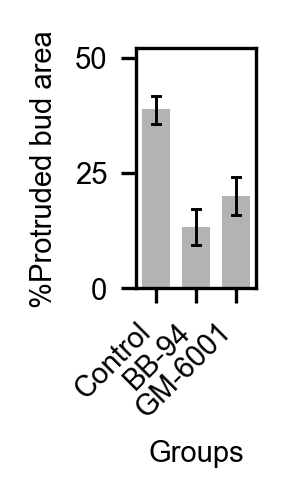

In [50]:
# Plot the bar graph to put in figures
outputPrefix = "20210123-7dpt-D193-D267-1to1-BB94-GM6001"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'protruded-area-bar.svg'

# Filter out only Control, BB-94 and GM-6001 data to plot
df = df[df.groups.isin(['Control', 'BB-94', 'GM-6001'])]

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100

plotCountBar(df.groups, df.percent_protruded_area, outputFigPath,
             yMax=52,
             yTicks=[0,25,50],
             yLabel='%Protruded bud area',
             xticklabels_angle=45,
             bar_width=0.7,
             fig_width=0.5, fig_height=1.0)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower  upper  reject
----------------------------------------------------
Anti-β1 Ctrl Ab   0.1519 0.001  0.1079 0.1959   True
Anti-β1   No Ab   0.1554 0.001  0.1114 0.1994   True
Ctrl Ab   No Ab   0.0035   0.9 -0.0405 0.0475  False
----------------------------------------------------
p values of all pair-wise tests:
 [0.001 0.001 0.9  ]


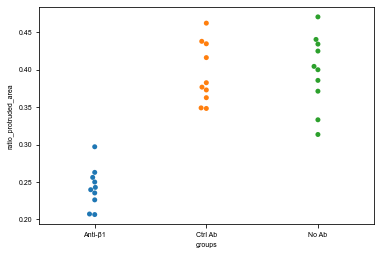

In [4]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20210125-1-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')

# Annotate the data set
# dataset name: 20210125-D193-D267-mAb13-mAb16-varying-mixing-ratios-6dpt-singleZ2
# new folder name: 20210125-1
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
# Note the D row is the shared control group with another experiment (varying mixing ratios)
#
# B2-B11: mAb13 (beta1-integrin blocking antibody) 100 μg/mL
# C2-C11: mAb16 (alpha5-integrin blocking antibody; serve as isotype-matched control) 100 μg/mL
# D2-D11: no antibody control

# groups = ["mAb13"]*10 + ["mAb16"]*10 + ["noAb"]*10
groups = ["Anti-β1"]*10 + ["Ctrl Ab"]*10 + ["No Ab"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

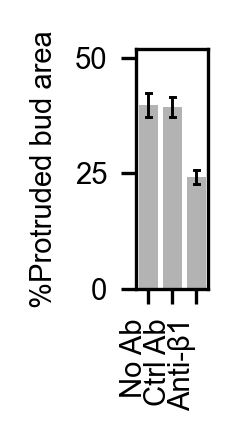

In [8]:
# Plot the bar graph to put in figures
outputPrefix = "20210125-6dpt-D193-D267-1to1-mAb13-mAb16"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'protruded-area-bar.svg'

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100

plotCountBar(df.groups, df.percent_protruded_area, outputFigPath,
             plotting_order=['No Ab', 'Ctrl Ab', 'Anti-β1'],
             yMax=52,
             yTicks=[0,25,50],
             yLabel='%Protruded bud area',
             xticklabels_angle=90,
             xLabel_off=True,
             bar_width=0.8,
             fig_width=0.3, fig_height=1.0)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     e      f   0.2127  0.001  0.1421 0.2833   True
     e      g   0.2385  0.001  0.1679 0.3091   True
     e      h   0.1891  0.001  0.1185 0.2597   True
     f      g   0.0258 0.7439 -0.0448 0.0964  False
     f      h  -0.0235 0.7911 -0.0941 0.0471  False
     g      h  -0.0493 0.2617 -0.1199 0.0213  False
---------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.74392592 0.79109032 0.26167876]


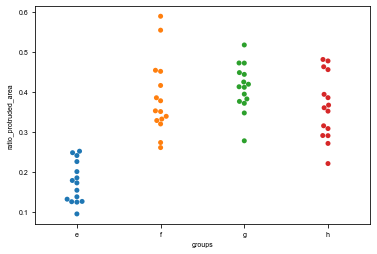

In [24]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20210203'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')

# Annotate the data set
# dataset name: 20210203-D193-D266-varying-mixing-ratios-6dpt
# new folder name: 20210203
#
# sg-Control (D193) : sg2-Cdh1 (D266; stronger guide):
# B2-B11 & C2-C6 (15 wells): 1 : 0
# C7-C11 & D2-D11 (15 wells): 4 : 1
# E2-E11 & F2-F6 (15 wells): 1 : 1
# F7-F11 & G2-G11 (15 wells): 0 : 1

# groups = ["D193"]*15 + ["25%D266"]*15 + ["50%D266"]*15 + ["D266"]*15
# groups = ["1"]*15 + ["2"]*15 + ["3"]*15 + ["4"]*15
groups = ["e"]*15 + ["f"]*15 + ["g"]*15 + ["h"]*15
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

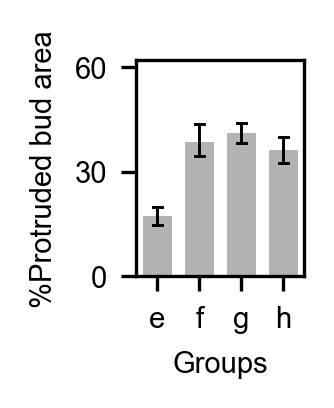

In [25]:
# Plot the bar graph to put in figures
outputPrefix = "20210203-D193-D266-varying-mixing-ratios-6dpt-"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'protruded-area-bar.svg'

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100

plotCountBar(df.groups, df.percent_protruded_area, outputFigPath,
             yMax=62,
             yTicks=[0,30,60],
             yLabel='%Protruded bud area',
#              xticklabels_angle=45,
#              xTickLabels=['Before dispase', 'After dispase', 'Recovery 6 day'],
#              xLabel_off=True,
             bar_width=.7,
             fig_width=.7, fig_height=.9)



Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2113  0.001 -0.2589 -0.1637   True
     1      3  -0.2152  0.001 -0.2753  -0.155   True
     1      4  -0.2488  0.001 -0.3069 -0.1907   True
     2      3  -0.0039    0.9 -0.0636  0.0558  False
     2      4  -0.0375 0.3194 -0.0951    0.02  False
     3      4  -0.0337 0.5563  -0.102  0.0346  False
----------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.9        0.31936578 0.55626863]


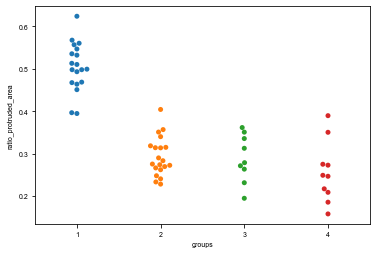

In [18]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20210208'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')

# Annotate the data set
# dataset name: 20210208-D193-D267-4-different-MGs-7dpt
# new folder name: 20210208
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# B2-C11: MG-1 5% + ABA
# D2-E11: MG-2 5% + ABA
# F2-F11: MG-3 5% + ABA
# G2-G11: MG-4 5% + ABA
#
# excluded: B9, F9
# reason: external fiber presence

groups = ["1"]*19 + ["2"]*20 + ["3"]*9 + ["4"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2  -0.1004 0.0059 -0.17 -0.0307   True
--------------------------------------------------
p values of all pair-wise tests:
 [0.00592028]


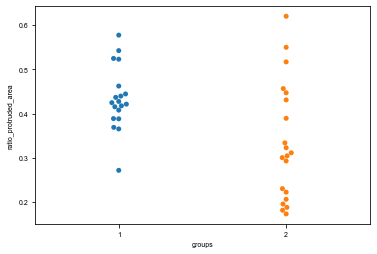

In [17]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20210209-1-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')

# Annotate the data set
# dataset name: 20210209-D193-D267-BB94-7dpt
# new folder name: 20210209-1
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# D2-E11: Matrigel + ABA
# F2-G11: Matrigel + ABA + BB-94 (5 μM)
#
# excluded: rows B-C; E5
# reason: rows B-C are for other experiments (no Matrigel testing); E5 image is incomplete.

groups = ["1"]*19 + ["2"]*20
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0151    0.9 -0.0889  0.0587  False
     1      3  -0.0961 0.0114 -0.1752 -0.0169   True
     1      4   0.0778 0.1497 -0.0172  0.1728  False
     1      5  -0.1875  0.001 -0.2825 -0.0925   True
     2      3   -0.081 0.0497  -0.162 -0.0001   True
     2      4   0.0929 0.0639 -0.0037  0.1894  False
     2      5  -0.1724  0.001  -0.269 -0.0759   True
     3      4   0.1739  0.001  0.0732  0.2745   True
     3      5  -0.0914  0.089 -0.1921  0.0092  False
     4      5  -0.2653  0.001 -0.3789 -0.1517   True
----------------------------------------------------
p values of all pair-wise tests:
 [0.9        0.01141442 0.14970994 0.001      0.04972348 0.06386879
 0.001      0.001      0.08896913 0.001     ]


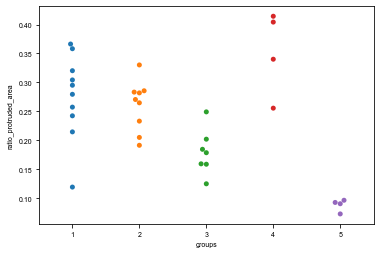

In [16]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20210209-2-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')

# Annotate the data set
# dataset name: 20210209-D193-D267-purified-components-7dpt
# new folder name: 20210209-2
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# B2-B11: (1 row) LMN-R 7.5% or 450 μg/mL (from 6 mg/mL; R&D 3446-005-01)
# C2-C11: (1 row) LMN-R 5% or 300 μg/mL (from 6 mg/mL; R&D 3446-005-01)
# D2-D9: (8 wells) LMN-S 450 μg/mL (stock 1.12 mg/mL; desalted from Sigma CC095)
# E2-E6: (5 wells) LMN-R 5% or 300 μg/mL + Col4-G 150 μg/mL
# F2-F6: (5 wells) LMN-R 5% or 300 μg/mL + Col4-G 150 μg/mL + Nidogen 50 μg/mL + Perlecan 50 μg/mL

# excluded: C8, D8, E2, F5
# reason: external fiber presence

groups = ["1"]*10 + ["2"]*9 + ["3"]*7 + ["4"]*4 + ["5"]*4
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     a      b   0.1791  0.001  0.0784 0.2798   True
     a      c   0.2722  0.001  0.1714 0.3729   True
     a      d   0.3237  0.001   0.223 0.4244   True
     b      c    0.093 0.0791 -0.0077 0.1938  False
     b      d   0.1446 0.0024  0.0439 0.2453   True
     c      d   0.0515 0.5188 -0.0492 0.1523  False
---------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.07909558 0.00240674 0.51875853]


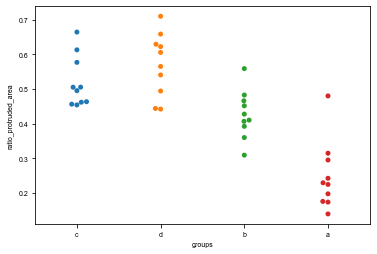

In [22]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'
datasetPrefix = '20210125-2-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')

# Annotate the data set
# dataset name: 20210125-D193-D267-mAb13-mAb16-varying-mixing-ratios-6dpt-singleZ2
# new folder name: 20210125-2
#
# These are D193 and D267 with varying mixing ratios.
# Note that the control (row D) is shared by the two experiments.
#
# D2-D11: sg-Control (D193) : sg1-Cdh1 (D267) = 1:1
# E2-E11: sg-Control (D193) : sg1-Cdh1 (D267) = 0:1
# F2-F11: sg-Control (D193) : sg1-Cdh1 (D267) = 4:1
# G2-G11: sg-Control (D193) : sg1-Cdh1 (D267) = 1:0

# groups = ["3"]*10 + ["4"]*10 + ["2"]*10 + ["1"]*10
groups = ["c"]*10 + ["d"]*10 + ["b"]*10 + ["a"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

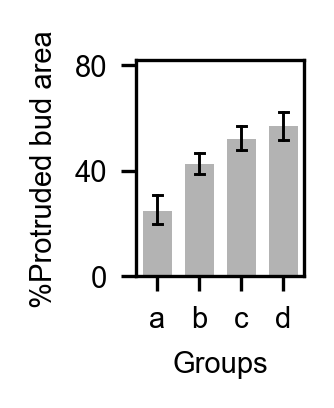

In [23]:
# Plot the bar graph to put in figures
outputPrefix = "20210125-D193-D267-varying-mixing-ratios-6dpt-"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'protruded-area-bar.svg'

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100

plotCountBar(df.groups, df.percent_protruded_area, outputFigPath,
             yMax=82,
             yTicks=[0,40,80],
             yLabel='%Protruded bud area',
             plotting_order=['a', 'b', 'c', 'd'],
#              xticklabels_angle=45,
#              xTickLabels=['Before dispase', 'After dispase', 'Recovery 6 day'],
#              xLabel_off=True,
             bar_width=.7,
             fig_width=.7, fig_height=.9)



Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2744  0.001 -0.3688   -0.18   True
     1      3  -0.1121 0.0112 -0.2065 -0.0177   True
     1      4   0.0318    0.9 -0.0626  0.1262  False
     1      5  -0.2539  0.001 -0.3483 -0.1595   True
     1      6  -0.1109 0.0125 -0.2053 -0.0165   True
     2      3   0.1623  0.001  0.0679  0.2567   True
     2      4   0.3062  0.001  0.2118  0.4006   True
     2      5   0.0205    0.9 -0.0739  0.1149  False
     2      6   0.1635  0.001  0.0691  0.2579   True
     3      4   0.1439  0.001  0.0495  0.2383   True
     3      5  -0.1418  0.001 -0.2362 -0.0474   True
     3      6   0.0012    0.9 -0.0932  0.0956  False
     4      5  -0.2857  0.001 -0.3801 -0.1913   True
     4      6  -0.1427  0.001 -0.2371 -0.0483   True
     5      6    0.143  0.001  0.0486  0.2374   True
----------------------------

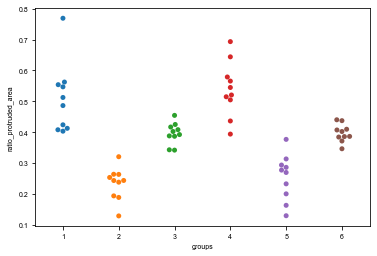

In [9]:
# combine 3 data sets:
# 1. before dispase treatment
# 2. 1 day after dispase treatment and MG-free culture
# 3. 6 days recovery after MG addition

datasetFolder = '../data/DLD-1-spheroids-protruded-area-KM/'

# 20210204-D193-D267-DMSO-or-ABA-all-MG-7dpt
# F2-F11: 10 spheroids of D193-D267 mix
# G2-G11: 10 spheroids of D267 only
#
datasetPrefix = '20210204-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')
df1 = df

# 20210205-
#
# * Note well position change because the spheroids were
# * cultured in a new plate after dispase treatment
#
# B2-B11: 10 spheroids of D193-D267 mix
# C2-C11: 10 spheroids of D267 only
#
datasetPrefix = '20210205-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')
df2 = df

# 20210211-
#
# * Recovery was by adding 100x 2x treatment mix on 2/5
#
# B2-B11: 10 spheroids of D193-D267 mix
# C2-C11: 10 spheroids of D267 only
#
datasetPrefix = '20210211-'
df = getAreaDFbyPrefix(datasetPrefix, datasetFolder, 'file_name')
df3 = df

df = pd.concat([df1, df2, df3])

# annotate groups
groups = ["1"]*10 + ["4"]*10 + ["2"]*10 + ["5"]*10 + ["3"]*10 + ["6"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.ratio_protruded_area)

# tukey test
tukeyTest(df.ratio_protruded_area, df.groups)

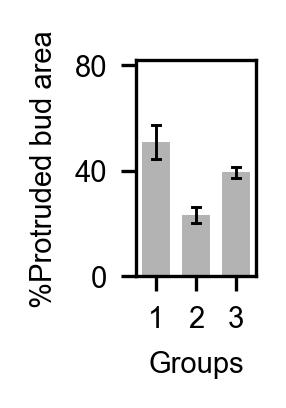

In [15]:
# Plot the bar graph to put in figures
outputPrefix = "20210204-11-dispase-recovery-D193-D267-mix-"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'protruded-area-bar.svg'

# Filter to plot only one data set (the other set is D267 only)
df = df[df.groups.isin(['1', '2', '3'])]

# Add a column with changed scale to use percentage
df['percent_protruded_area'] = df.ratio_protruded_area * 100

plotCountBar(df.groups, df.percent_protruded_area, outputFigPath,
             yMax=82,
             yTicks=[0,40,80],
             yLabel='%Protruded bud area',
#              xticklabels_angle=45,
#              xTickLabels=['Before dispase', 'After dispase', 'Recovery 6 day'],
#              xLabel_off=True,
             bar_width=.7,
             fig_width=.5, fig_height=.9)

